## Features of putative synthetic lethal paralog pairs

**Input:** putative synthetic lethal pairs annotated among closest/all paralog pairs (results from nb 5)

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multitest import fdrcorrection
import os
import re
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 1
from graphing_utils import *
%aimport graphing_utils

get_local_data_path = lambda folders, fname: os.path.normpath('../data/'+'/'.join(folders) +'/'+fname)

file_results_closest = get_local_data_path(['processed', 'results'], 'closest_paralog_pairs_17_07_19.csv')
file_results_all = get_local_data_path(['processed', 'results'], 'all_paralog_pairs_17_07_19.csv')
file_all_pairs = get_local_data_path(['processed', 'ensembl93'], 'all_pairs.csv')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Results from Notebook 5

In [2]:
# Gene with closest (most sequence similar) paralog
results_closest_pairs = pd.read_csv(file_results_closest)
print('Num A1 SLs:', results_closest_pairs[results_closest_pairs.SL].A1.nunique(),'/', results_closest_pairs.A1.nunique())
results_closest_pairs[:1]

Num A1 SLs: 238 / 1819


,A1,A2,ttest_p,A2_expr_A1_NE,A2_expr_A1_E,ttest_p_correct,SL,percent_matched_in_paralog,WGD,either_in_complex,in_same_complex,A1_ensembl,A2_ensembl,A1_entrez,A2_entrez
0,TEKT2,TEKT1,0.804338,0.038786,0.033592,0.934903,False,0.311628,WGD,False,False,ENSG00000092850,ENSG00000167858,27285,83659


In [3]:
# All paralog pairs
results_all_pairs = pd.read_csv(file_results_all)
print('Num A1 SLs:', results_all_pairs[results_all_pairs.SL].A1.nunique(),'/', results_all_pairs.A1.nunique())
results_all_pairs[:1]

Num A1 SLs: 302 / 1829


,A1,A2,ttest_p,A2_expr_A1_NE,A2_expr_A1_E,ttest_p_correct,SL,percent_matched_in_paralog,WGD,either_in_complex,in_same_complex,A1_ensembl,A2_ensembl,A1_entrez,A2_entrez
0,TEKT2,TEKT4,0.160877,0.064105,0.023072,0.520612,False,0.293023,WGD,False,False,ENSG00000092850,ENSG00000163060,27285,150483


### Are synthetic lethals enriched in WGDs and members of protein complexes?
- Is there an overrepresentation of protein complex subunits?
- How many occur between members of the same protein complex?

In [5]:
def test_duplication_mode(pairs):
    ctab = pd.crosstab(pairs.WGD=='WGD', pairs.SL, dropna=False)
    assert(ctab.sum().sum() == pairs.shape[0])
    print('WGDs enriched in SLs? FET: ', stats.fisher_exact(ctab.T))

def test_complex_membership(pairs):
    ctab = pd.crosstab(pairs.either_in_complex, pairs.SL, dropna=False)
    assert(ctab.sum().sum() == pairs.shape[0])
    print('Complex members enriched in SLs? FET: ', stats.fisher_exact(ctab))
    ctab = pd.crosstab(pairs.in_same_complex, pairs.SL, dropna=False)
    print('Co-complex members enriched in SLs? FET: ', stats.fisher_exact(ctab))

test_duplication_mode(results_closest_pairs)
test_complex_membership(results_closest_pairs)

WGDs enriched in SLs? FET:  (2.287421491705324, 7.75990926075655e-08)
Complex members enriched in SLs? FET:  (2.296678529062871, 3.2863828427019845e-09)
Co-complex members enriched in SLs? FET:  (2.578125, 3.3555676016977416e-05)


In [6]:
def draw_duplication_mode_plot(pairs, ax, color=get_color_palette(4)):
    ctab = pd.crosstab(pairs.WGD, pairs.SL, dropna=False)
    ctab = ctab.apply(lambda x: x/sum(x)*100, axis=1).loc[['WGD','SSD'],True]
    ctab.plot.bar(stacked=True, rot=0, ax=ax, color=get_color_palette(4), width=0.85)
    ax.set_ylabel('% of tested pairs that\n buffer each other')
    ax.set_xlabel(''); ax.xaxis.set_tick_params(labelsize=mpl.rcParams['axes.labelsize'])
    ax.grid(axis='y')

def draw_complex_membership_plot(pairs, ax, color='silver'):
    ctab = pd.crosstab(pairs.either_in_complex, pairs.SL, dropna=False)
    ctab = ctab.apply(lambda x: x/sum(x)*100, axis=1).reindex(index=[True, False]).loc[:,True]
    ctab.plot.bar(stacked=True, rot=0, ax=ax, color=color, width=0.85)
    ax.set_xlabel('Either gene is in a\nprotein complex')
    ax.set_ylabel('% of tested pairs that\n buffer each other')
    ax.grid(axis='y')

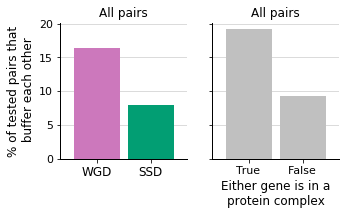

In [15]:
f, ax = plt.subplots(1, 2, figsize=(5, 2.5), sharey=True)
draw_duplication_mode_plot(results_closest_pairs, ax[0])
draw_complex_membership_plot(results_closest_pairs, ax[1])

ax[0].set_title('All pairs', fontsize=12)
ax[1].set_title('All pairs', fontsize=12)

#plt.savefig('../figures/fig_6AB.svg', bbox_inches='tight', dpi=300)

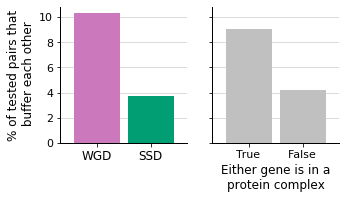

In [21]:
# Repeat for all paralog pairs results
f, ax = plt.subplots(1, 2, figsize=(5, 2.5), sharey=True)
draw_duplication_mode_plot(results_all_pairs, ax[0])
draw_complex_membership_plot(results_all_pairs, ax[1])

#plt.savefig('../figures/fig_S2CD.svg', bbox_inches='tight', dpi=300)

### Are WGD and protein complex membership independently predictive?
* When only analysing WGD pairs, are the SL pairs still more likely to be members of protein complexes?
* When only analysing protein complex members, are the WGD pairs still enriched in SLs?

Are WGDs enriched in protein complex membership? FET:  (2.3009061462886513, 2.1174067388525578e-271)
Are WGDs enriched in same protein complex membership? FET:  (5.024161884627001, 3.820869760395656e-92)


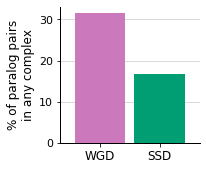

In [10]:
# First check WGD vs protein complex for the full set of paralog pairs
all_pairs = pd.read_csv(file_all_pairs, index_col=0)
ctab = pd.crosstab(all_pairs.WGD, all_pairs.either_in_complex, dropna=False)
print('Are WGDs enriched in protein complex membership? FET: ', stats.fisher_exact(ctab))
ctab = ctab.apply(lambda x: x/sum(x)*100, axis=1).loc[['WGD', 'SSD'],True]
print('Are WGDs enriched in same protein complex membership? FET: ', 
      stats.fisher_exact(pd.crosstab(all_pairs.WGD, all_pairs.in_same_complex)))

f, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), sharey=True)
ctab.plot.bar(stacked=True, rot=0, width=0.85, ax=ax, color=get_color_palette(4))
ax.set_ylabel('% of paralog pairs\nin any complex')
ax.set_xlabel(''); ax.xaxis.set_tick_params(labelsize=mpl.rcParams['axes.labelsize'])
ax.grid(axis='y')

#plt.savefig('../figures/fig_S2A.svg',  bbox_inches='tight', dpi=300)

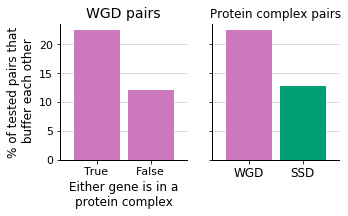

In [16]:
f, ax = plt.subplots(1, 2, figsize=(5, 2.5), sharey=True)
draw_complex_membership_plot(results_closest_pairs[results_closest_pairs.WGD=='WGD'], ax[0], color=get_color_palette(6))
draw_duplication_mode_plot(results_closest_pairs[results_closest_pairs.either_in_complex], ax[1])
ax[0].set_title('WGD pairs')
ax[1].set_title('Protein complex pairs', fontsize=12)

#plt.savefig('../figures/fig_6CD.svg',  bbox_inches='tight', dpi=300)

### Check pairs w/ significant difference in expression in the opposite direction
Is there an enrichment for WGD / complex membership among signif pairs that have higher A2 expression when A1 is essential?

In [17]:
# Check pairs that have A2 expr A1 E > A2 expr A1 NE
df = results_closest_pairs.assign(signif =((results_closest_pairs.ttest_p_correct < 0.1) & 
                                           (results_closest_pairs.A2_expr_A1_E > results_closest_pairs.A2_expr_A1_NE)))
print('Num closest pairs w/ A1 E expr > A2 NE expr:', df[df.signif==True].shape[0])

ctab = pd.crosstab(df.WGD, df.signif, dropna=False)
print('WGDs enriched in these pairs?', stats.fisher_exact(ctab))

ctab = pd.crosstab(df.signif, df.either_in_complex, dropna=False)
print('Complex members enriched in these pairs?', stats.fisher_exact(ctab))

Num closest pairs w/ A1 E expr > A2 NE expr: 92
WGDs enriched in these pairs? (0.6385199240986718, 0.03779643404114937)
Complex members enriched in these pairs? (1.0418382831129416, 0.9123879261436421)


### Are sequence similar pairs enriched in synthetic lethals? 

All tested pairs  t-test p-value:  3.619211067559376e-17
WGD tested pairs  t-test p-value:  5.83389272423144e-10
SSD tested pairs  t-test p-value:  7.050074619329103e-06
Tested pairs
in a complex  t-test p-value:  1.0453918256930673e-10


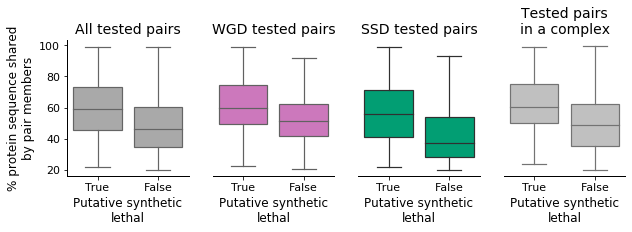

In [19]:
def graph_seq_id_boxplot(pairs, ax, title, color, show_y=False):
    df = pairs.assign(percent_matched_in_paralog = pairs.percent_matched_in_paralog * 100)
    sns.boxplot(y="percent_matched_in_paralog", x="SL", data=df, color=color, ax=ax, saturation=1, linewidth=1.2, 
                order = [True, False], showfliers=False)
    ax.set_xlabel('Putative synthetic\nlethal')
    ax.set_ylabel('% protein sequence shared\nby pair members')
    ax.set_title(title)
    if show_y == False:
        ax.get_yaxis().set_visible(False); ax.spines['left'].set_visible(False)
    print(title, ' t-test p-value: ', stats.ttest_ind(df[df.SL == True].percent_matched_in_paralog, 
                                                      df[df.SL == False].percent_matched_in_paralog)[1])

f, ax = plt.subplots(1, 4, figsize=(10, 2.5), sharey=True)
palette = get_color_palette(5)
graph_seq_id_boxplot(results_closest_pairs, ax[0],  'All tested pairs', 'darkgray', show_y=True)
graph_seq_id_boxplot(results_closest_pairs[results_closest_pairs.WGD=='WGD'], ax[1], 'WGD tested pairs', palette[1])
graph_seq_id_boxplot(results_closest_pairs[results_closest_pairs.WGD=='SSD'], ax[2], 'SSD tested pairs', palette[0])
graph_seq_id_boxplot(results_closest_pairs[results_closest_pairs.either_in_complex], ax[3], 
                     'Tested pairs\nin a complex', 'silver')
plt.savefig('../figures/fig_6E.svg',  bbox_inches='tight', dpi=300)